In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use(['dark_background'])

import urllib.request
import json


import seaborn as sns
sns.set(color_codes=True)

In [2]:
style.use('seaborn-ticks')
sns.set(color_codes=True)

In [3]:
url = 'https://api.covid19india.org/states_daily.json'
urllib.request.urlretrieve(url, 'data.json')

with open('data.json') as f:
  data = json.load(f)
data = data['states_daily']
df = pd.json_normalize(data)

In [5]:
df.tail(3)

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,...,sk,status,tg,tn,tr,tt,un,up,ut,wb
966,0,129,1,29,123,17,413,30-Jan-21,2021-01-30,0,...,3,Confirmed,186,505,2,13073,0,242,82,310
967,1,147,0,70,187,25,502,30-Jan-21,2021-01-30,0,...,6,Recovered,367,526,2,14077,0,474,167,341
968,0,1,0,1,4,0,9,30-Jan-21,2021-01-30,0,...,0,Deceased,2,5,0,128,0,4,1,9


In [6]:

df.drop('date', axis=1, inplace=True)
df.drop('dateymd', axis=1, inplace=True)

## Analysing the recent cases

In [7]:
df_=df.tail(3)
df_.set_index('status', inplace=True)

In [8]:
df_=df_.T
df_=df_.apply(pd.to_numeric)

In [9]:
df_

status,Confirmed,Recovered,Deceased
an,0,1,0
ap,129,147,1
ar,1,0,0
as,29,70,1
br,123,187,4
ch,17,25,0
ct,413,502,9
dd,0,0,0
dl,183,290,8
dn,0,2,0


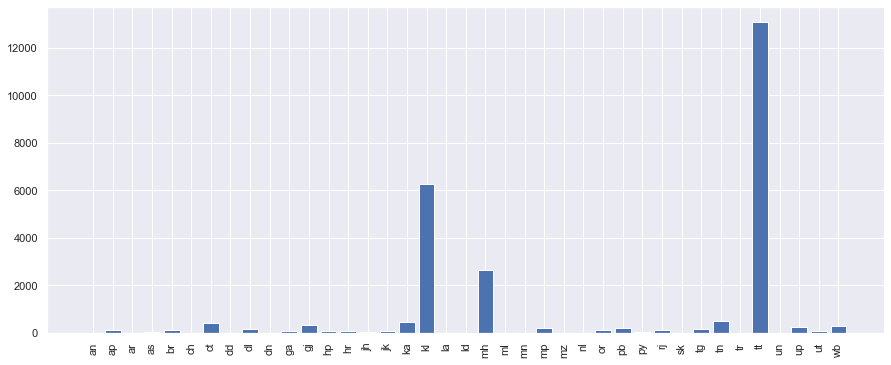

In [10]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.bar(df_.index, df_.Confirmed);
plt.xticks(rotation=90);

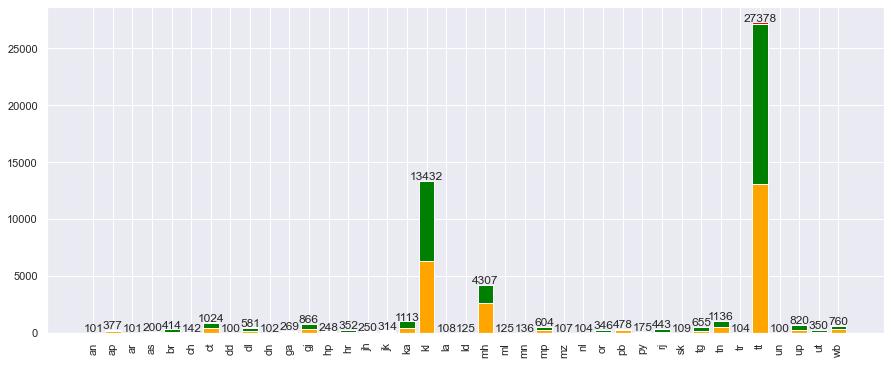

In [11]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.bar(df_.index, df_.Confirmed, color='Orange');
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed, color='Green');
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered, color='Red');
plt.xticks(rotation=90);
for i, val in enumerate(df_.index):
    y = df_.loc[val].sum() + 100
    x = i
    plt.text(x, y, str(y), ha="center");

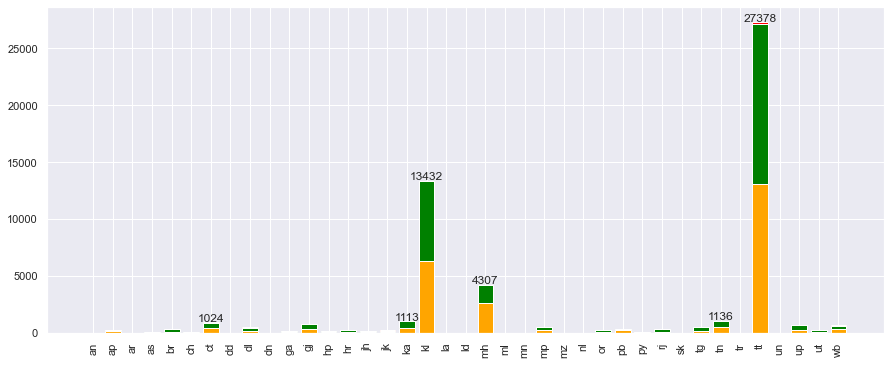

In [12]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.bar(df_.index, df_.Confirmed, color='Orange');
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed, color='Green');
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered, color='Red');
plt.xticks(rotation=90);

for i, val in enumerate(df_.index):
    y = df_.loc[val].sum() + 100
    if y > 1000:
        x = i
        plt.text(x, y, str(y), ha="center");

In [13]:
df_['Total'] = 0

In [14]:
df_['Total'] = df_.sum(axis = 1)

In [13]:
df_.head()

status,Confirmed,Recovered,Deceased,Total
an,1,9,0,10
ap,56,141,2,199
ar,0,0,0,0
as,25,83,0,108
br,82,222,4,308


In [15]:
df_['ConfirmedFraction'] = df_['Confirmed'] / df_['Total']
df_['RecoveredFraction'] = df_['Recovered'] / df_['Total']
df_['DeceasedFraction'] = df_['Deceased'] / df_['Total']

## relative plot

In [16]:
df_.head()

status,Confirmed,Recovered,Deceased,Total,ConfirmedFraction,RecoveredFraction,DeceasedFraction
an,0,1,0,1,0.000000,1.000000,0.000000
ap,129,147,1,277,0.465704,0.530686,0.003610
ar,1,0,0,1,1.000000,0.000000,0.000000
as,29,70,1,100,0.290000,0.700000,0.010000
br,123,187,4,314,0.391720,0.595541,0.012739


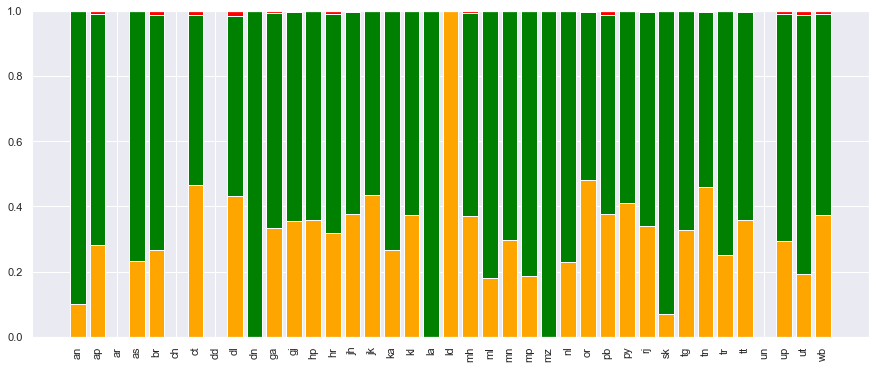

In [16]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.bar(df_.index, df_.ConfirmedFraction, color='Orange');
plt.bar(df_.index, df_.RecoveredFraction, bottom=df_.ConfirmedFraction, color='Green');
plt.bar(df_.index, df_.DeceasedFraction, bottom=df_.ConfirmedFraction + df_.RecoveredFraction, color='Red');
plt.xticks(rotation=90);

In [17]:
df_ = df_.sort_values('ConfirmedFraction', ascending=False)

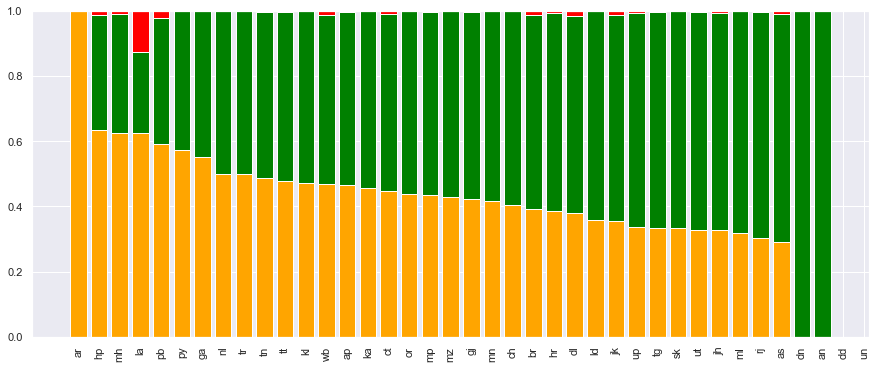

In [18]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.bar(df_.index, df_.ConfirmedFraction, color='Orange');
plt.bar(df_.index, df_.RecoveredFraction, bottom=df_.ConfirmedFraction, color='Green');
plt.bar(df_.index, df_.DeceasedFraction, bottom=df_.ConfirmedFraction + df_.RecoveredFraction, color='Red');
plt.xticks(rotation=90);

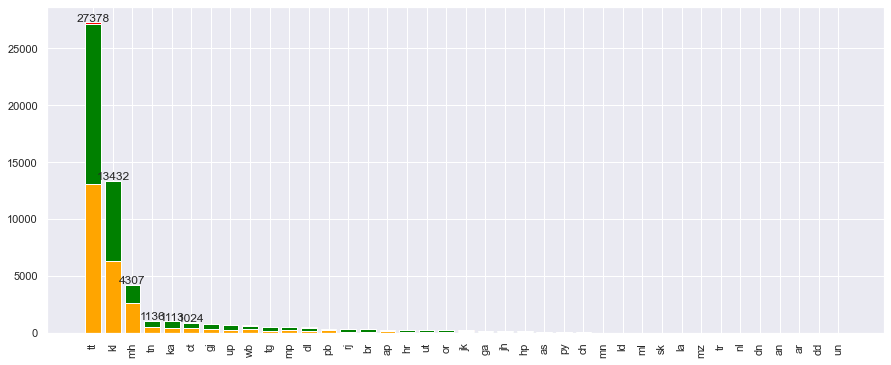

In [19]:
df_ = df_.sort_values('Total', ascending=False)

fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.bar(df_.index, df_.Confirmed, color='Orange');
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed, color='Green');
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered, color='Red');
plt.xticks(rotation=90);

for i, val in enumerate(df_.index):
    y = df_.loc[val, 'Total'] + 100
    if y > 1000:
        x = i
        plt.text(x, y, str(y), ha="center");

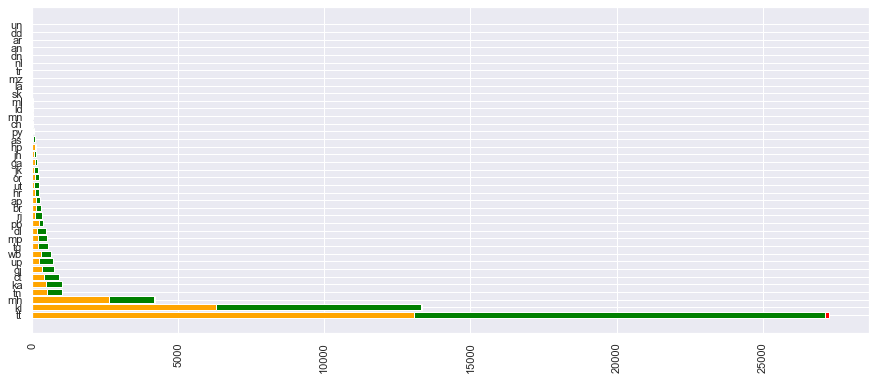

In [20]:
df_ = df_.sort_values('Total', ascending=False)

fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.barh(df_.index, df_.Confirmed, color='Orange');
plt.barh(df_.index, df_.Recovered, left=df_.Confirmed, color='Green');
plt.barh(df_.index, df_.Deceased, left=df_.Confirmed + df_.Recovered, color='Red');
plt.xticks(rotation=90);

In [21]:
covid_data = pd.json_normalize(data)

In [22]:
covid_data.head(3)

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,...,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Deceased,0,0,0,2,0,0,0,0


In [23]:
df_1=covid_data

In [24]:
df_1.date = pd.to_datetime(covid_data.date)

In [25]:
df_1.drop('dateymd',axis=1,inplace=True)

In [26]:
df_1 = df_1[df_1.status == 'Confirmed']
df_1.drop('status', axis=1, inplace=True)
df_1.set_index('date', inplace=True)

C:\Users\msree\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [27]:
df_1

,an,ap,ar,as,br,ch,ct,dd,dl,dn,...,rj,sk,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,
2020-03-14,0,1,0,0,0,0,0,0,7,0,...,3,0,1,1,0,81,0,12,0,0
2020-03-15,0,0,0,0,0,0,0,0,0,0,...,1,0,2,0,0,27,0,1,0,0
2020-03-16,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,15,0,0,1,0
2020-03-17,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,11,0,2,0,1
2020-03-18,0,0,0,0,0,0,0,0,2,0,...,3,0,8,1,0,37,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-26,0,172,1,8,160,0,321,0,157,1,...,125,6,189,523,1,12733,0,301,39,295
2021-01-27,0,111,3,17,86,40,439,0,96,1,...,134,1,147,512,0,11556,0,168,85,234
2021-01-28,0,117,3,29,134,36,6451,0,199,0,...,85,5,186,503,0,18912,0,248,82,289


In [28]:
df_1 = df_1.apply(pd.to_numeric)

In [29]:
df_1 = df_1.tail(14)

In [30]:
df_1.style

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-17 00:00:00,1,161,3,22,211,34,323,0,246,1,60,518,70,178,87,126,745,5005,7,0,3081,12,21,355,8,4,183,239,35,261,9,299,589,0,13962,0,391,112,565
2021-01-18 00:00:00,5,81,1,33,144,27,471,0,161,0,53,495,35,119,100,82,435,3346,1,14,1924,2,11,304,1,3,134,124,23,213,0,206,551,3,9987,0,376,120,389
2021-01-19 00:00:00,1,179,3,23,189,31,383,0,231,0,112,485,41,153,101,113,645,6186,5,7,2294,3,33,304,6,5,122,208,37,209,14,256,543,3,13787,0,334,116,412
2021-01-20 00:00:00,2,173,0,32,209,28,594,0,228,2,87,490,63,105,125,109,501,6815,6,9,3015,7,19,280,5,1,157,199,31,213,5,267,549,1,15279,0,390,153,409
2021-01-21 00:00:00,0,139,1,21,168,16,560,0,227,0,55,471,39,133,67,117,674,6334,5,18,2886,4,19,301,12,3,143,180,35,265,5,226,596,2,14495,0,195,162,416
2021-01-22 00:00:00,1,137,1,17,168,25,440,0,266,1,70,451,41,120,75,88,324,6753,0,2,2779,2,15,347,3,2,154,206,22,201,1,214,574,4,14323,0,303,110,406
2021-01-23 00:00:00,1,158,1,19,149,22,377,0,197,0,85,423,27,136,78,94,902,6960,2,7,2697,4,17,291,0,4,130,211,36,203,5,221,586,2,14896,0,319,122,410
2021-01-24 00:00:00,0,158,1,16,131,32,298,0,185,0,53,410,21,128,54,73,573,6036,12,0,2752,5,16,252,2,0,150,197,30,167,3,197,569,0,13232,0,268,54,389
2021-01-25 00:00:00,1,56,1,25,82,61,484,0,148,0,57,390,35,118,74,64,375,3361,0,10,1842,2,11,200,0,3,130,159,18,193,1,148,540,1,9098,0,194,62,252


In [31]:
def bold_max_value(x):
    is_max = (x == x.max())
    return ['font-weight: bold' if y else '' for y in is_max]



## analysing cases from last 2 weeks 

### For each state

In [32]:
df_1.style.apply(bold_max_value).highlight_min(color='green').highlight_max(color='red')

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-17 00:00:00,1,161,3,22,211,34,323,0,246,1,60,518,70,178,87,126,745,5005,7,0,3081,12,21,355,8,4,183,239,35,261,9,299,589,0,13962,0,391,112,565
2021-01-18 00:00:00,5,81,1,33,144,27,471,0,161,0,53,495,35,119,100,82,435,3346,1,14,1924,2,11,304,1,3,134,124,23,213,0,206,551,3,9987,0,376,120,389
2021-01-19 00:00:00,1,179,3,23,189,31,383,0,231,0,112,485,41,153,101,113,645,6186,5,7,2294,3,33,304,6,5,122,208,37,209,14,256,543,3,13787,0,334,116,412
2021-01-20 00:00:00,2,173,0,32,209,28,594,0,228,2,87,490,63,105,125,109,501,6815,6,9,3015,7,19,280,5,1,157,199,31,213,5,267,549,1,15279,0,390,153,409
2021-01-21 00:00:00,0,139,1,21,168,16,560,0,227,0,55,471,39,133,67,117,674,6334,5,18,2886,4,19,301,12,3,143,180,35,265,5,226,596,2,14495,0,195,162,416
2021-01-22 00:00:00,1,137,1,17,168,25,440,0,266,1,70,451,41,120,75,88,324,6753,0,2,2779,2,15,347,3,2,154,206,22,201,1,214,574,4,14323,0,303,110,406
2021-01-23 00:00:00,1,158,1,19,149,22,377,0,197,0,85,423,27,136,78,94,902,6960,2,7,2697,4,17,291,0,4,130,211,36,203,5,221,586,2,14896,0,319,122,410
2021-01-24 00:00:00,0,158,1,16,131,32,298,0,185,0,53,410,21,128,54,73,573,6036,12,0,2752,5,16,252,2,0,150,197,30,167,3,197,569,0,13232,0,268,54,389
2021-01-25 00:00:00,1,56,1,25,82,61,484,0,148,0,57,390,35,118,74,64,375,3361,0,10,1842,2,11,200,0,3,130,159,18,193,1,148,540,1,9098,0,194,62,252


### overall

In [33]:
df_1.style.apply(bold_max_value).highlight_min(color='green',axis=1).highlight_max(color='red',axis=1)

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-17 00:00:00,1,161,3,22,211,34,323,0,246,1,60,518,70,178,87,126,745,5005,7,0,3081,12,21,355,8,4,183,239,35,261,9,299,589,0,13962,0,391,112,565
2021-01-18 00:00:00,5,81,1,33,144,27,471,0,161,0,53,495,35,119,100,82,435,3346,1,14,1924,2,11,304,1,3,134,124,23,213,0,206,551,3,9987,0,376,120,389
2021-01-19 00:00:00,1,179,3,23,189,31,383,0,231,0,112,485,41,153,101,113,645,6186,5,7,2294,3,33,304,6,5,122,208,37,209,14,256,543,3,13787,0,334,116,412
2021-01-20 00:00:00,2,173,0,32,209,28,594,0,228,2,87,490,63,105,125,109,501,6815,6,9,3015,7,19,280,5,1,157,199,31,213,5,267,549,1,15279,0,390,153,409
2021-01-21 00:00:00,0,139,1,21,168,16,560,0,227,0,55,471,39,133,67,117,674,6334,5,18,2886,4,19,301,12,3,143,180,35,265,5,226,596,2,14495,0,195,162,416
2021-01-22 00:00:00,1,137,1,17,168,25,440,0,266,1,70,451,41,120,75,88,324,6753,0,2,2779,2,15,347,3,2,154,206,22,201,1,214,574,4,14323,0,303,110,406
2021-01-23 00:00:00,1,158,1,19,149,22,377,0,197,0,85,423,27,136,78,94,902,6960,2,7,2697,4,17,291,0,4,130,211,36,203,5,221,586,2,14896,0,319,122,410
2021-01-24 00:00:00,0,158,1,16,131,32,298,0,185,0,53,410,21,128,54,73,573,6036,12,0,2752,5,16,252,2,0,150,197,30,167,3,197,569,0,13232,0,268,54,389
2021-01-25 00:00:00,1,56,1,25,82,61,484,0,148,0,57,390,35,118,74,64,375,3361,0,10,1842,2,11,200,0,3,130,159,18,193,1,148,540,1,9098,0,194,62,252


In [34]:
df_1.style.background_gradient(cmap='Reds')

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-17 00:00:00,1,161,3,22,211,34,323,0,246,1,60,518,70,178,87,126,745,5005,7,0,3081,12,21,355,8,4,183,239,35,261,9,299,589,0,13962,0,391,112,565
2021-01-18 00:00:00,5,81,1,33,144,27,471,0,161,0,53,495,35,119,100,82,435,3346,1,14,1924,2,11,304,1,3,134,124,23,213,0,206,551,3,9987,0,376,120,389
2021-01-19 00:00:00,1,179,3,23,189,31,383,0,231,0,112,485,41,153,101,113,645,6186,5,7,2294,3,33,304,6,5,122,208,37,209,14,256,543,3,13787,0,334,116,412
2021-01-20 00:00:00,2,173,0,32,209,28,594,0,228,2,87,490,63,105,125,109,501,6815,6,9,3015,7,19,280,5,1,157,199,31,213,5,267,549,1,15279,0,390,153,409
2021-01-21 00:00:00,0,139,1,21,168,16,560,0,227,0,55,471,39,133,67,117,674,6334,5,18,2886,4,19,301,12,3,143,180,35,265,5,226,596,2,14495,0,195,162,416
2021-01-22 00:00:00,1,137,1,17,168,25,440,0,266,1,70,451,41,120,75,88,324,6753,0,2,2779,2,15,347,3,2,154,206,22,201,1,214,574,4,14323,0,303,110,406
2021-01-23 00:00:00,1,158,1,19,149,22,377,0,197,0,85,423,27,136,78,94,902,6960,2,7,2697,4,17,291,0,4,130,211,36,203,5,221,586,2,14896,0,319,122,410
2021-01-24 00:00:00,0,158,1,16,131,32,298,0,185,0,53,410,21,128,54,73,573,6036,12,0,2752,5,16,252,2,0,150,197,30,167,3,197,569,0,13232,0,268,54,389
2021-01-25 00:00:00,1,56,1,25,82,61,484,0,148,0,57,390,35,118,74,64,375,3361,0,10,1842,2,11,200,0,3,130,159,18,193,1,148,540,1,9098,0,194,62,252


In [35]:
df_1.style.background_gradient(cmap='Reds', subset=['kl', 'mh', 'tt'])

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-17 00:00:00,1,161,3,22,211,34,323,0,246,1,60,518,70,178,87,126,745,5005,7,0,3081,12,21,355,8,4,183,239,35,261,9,299,589,0,13962,0,391,112,565
2021-01-18 00:00:00,5,81,1,33,144,27,471,0,161,0,53,495,35,119,100,82,435,3346,1,14,1924,2,11,304,1,3,134,124,23,213,0,206,551,3,9987,0,376,120,389
2021-01-19 00:00:00,1,179,3,23,189,31,383,0,231,0,112,485,41,153,101,113,645,6186,5,7,2294,3,33,304,6,5,122,208,37,209,14,256,543,3,13787,0,334,116,412
2021-01-20 00:00:00,2,173,0,32,209,28,594,0,228,2,87,490,63,105,125,109,501,6815,6,9,3015,7,19,280,5,1,157,199,31,213,5,267,549,1,15279,0,390,153,409
2021-01-21 00:00:00,0,139,1,21,168,16,560,0,227,0,55,471,39,133,67,117,674,6334,5,18,2886,4,19,301,12,3,143,180,35,265,5,226,596,2,14495,0,195,162,416
2021-01-22 00:00:00,1,137,1,17,168,25,440,0,266,1,70,451,41,120,75,88,324,6753,0,2,2779,2,15,347,3,2,154,206,22,201,1,214,574,4,14323,0,303,110,406
2021-01-23 00:00:00,1,158,1,19,149,22,377,0,197,0,85,423,27,136,78,94,902,6960,2,7,2697,4,17,291,0,4,130,211,36,203,5,221,586,2,14896,0,319,122,410
2021-01-24 00:00:00,0,158,1,16,131,32,298,0,185,0,53,410,21,128,54,73,573,6036,12,0,2752,5,16,252,2,0,150,197,30,167,3,197,569,0,13232,0,268,54,389
2021-01-25 00:00:00,1,56,1,25,82,61,484,0,148,0,57,390,35,118,74,64,375,3361,0,10,1842,2,11,200,0,3,130,159,18,193,1,148,540,1,9098,0,194,62,252


In [36]:
df_1[['kl', 'mh', 'tt']].style.bar(subset=['kl'], color='red').bar(subset=['mh'], color='orange').bar(subset=['tt'], color='yellow')

,kl,mh,tt
date,,,
2021-01-17 00:00:00,5005,3081,13962
2021-01-18 00:00:00,3346,1924,9987
2021-01-19 00:00:00,6186,2294,13787
2021-01-20 00:00:00,6815,3015,15279
2021-01-21 00:00:00,6334,2886,14495
2021-01-22 00:00:00,6753,2779,14323
2021-01-23 00:00:00,6960,2697,14896
2021-01-24 00:00:00,6036,2752,13232
2021-01-25 00:00:00,3361,1842,9098


### Analysing kl,mh,tt seperatly

In [37]:
def plot_stacked_area_by_state(state):
    dff_ = covid_data[[state, 'date', 'status']]
    dff_[state] = pd.to_numeric(dff_[state])
    dff_['date'] = pd.to_datetime(dff_['date'])
    dff_ = dff_.pivot_table(values=state, columns="status", index="date")
    fig = plt.gcf();
    fig.set_size_inches(15, 6);
    plt.stackplot(dff_.index, dff_.Confirmed, dff_.Recovered, dff_.Deceased,
              labels=['Confirmed', 'Recovered', 'Deceased'],
              colors=['orange', 'green', 'red']);
    plt.legend();

<ipython-input-37-d4d0823494a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff_[state] = pd.to_numeric(dff_[state])
<ipython-input-37-d4d0823494a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff_['date'] = pd.to_datetime(dff_['date'])


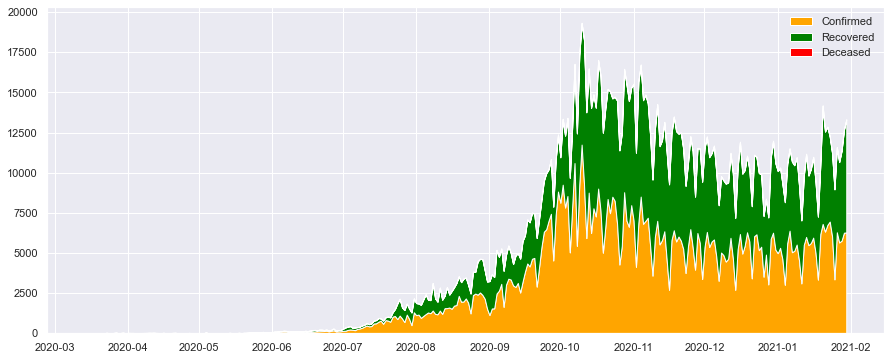

In [38]:
plot_stacked_area_by_state('kl')

<ipython-input-37-d4d0823494a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff_[state] = pd.to_numeric(dff_[state])
<ipython-input-37-d4d0823494a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff_['date'] = pd.to_datetime(dff_['date'])


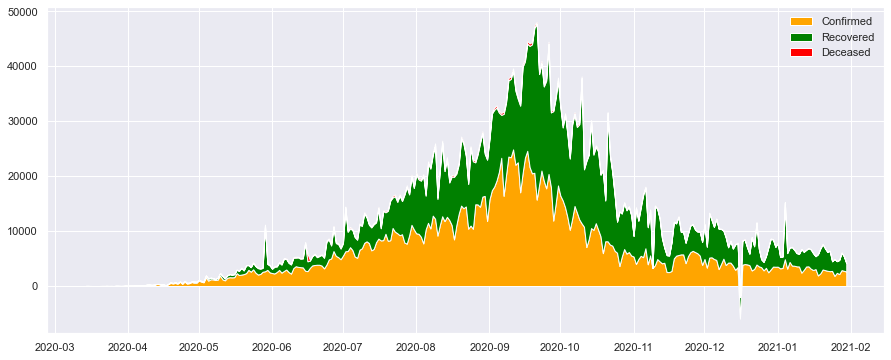

In [39]:
plot_stacked_area_by_state('mh')

<ipython-input-37-d4d0823494a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff_[state] = pd.to_numeric(dff_[state])
<ipython-input-37-d4d0823494a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff_['date'] = pd.to_datetime(dff_['date'])


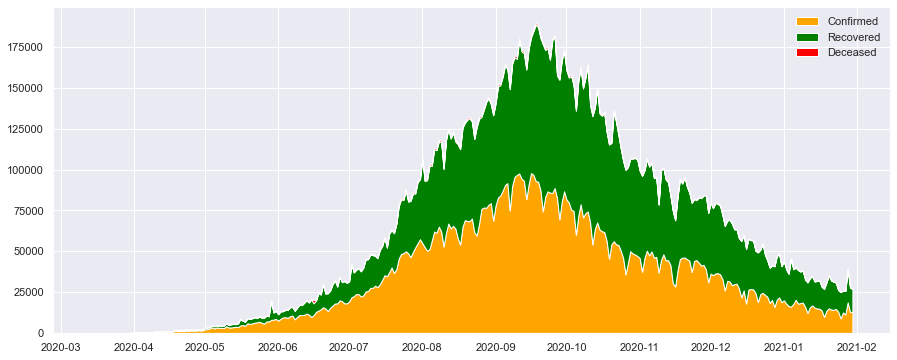

In [40]:
plot_stacked_area_by_state('tt');

In [41]:
def plot_relativestacked_area_by_state(state):
    dff_ = covid_data[[state, 'date', 'status']]
    dff_[state] = pd.to_numeric(dff_[state])
    dff_['date'] = pd.to_datetime(dff_['date'])
    dff_ = dff_.pivot_table(values=state, columns="status", index="date")
    fig = plt.gcf();
    fig.set_size_inches(15, 6);
    plt.stackplot(dff_.index, dff_.Confirmed/dff_.sum(axis=1), 
                dff_.Recovered/dff_.sum(axis=1), 
                dff_.Deceased/dff_.sum(axis=1),
                labels=['Confirmed', 'Recovered', 'Deceased'],
                colors=['orange', 'green', 'red']);
    plt.legend();

<ipython-input-41-6f8c87dfd4c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff_[state] = pd.to_numeric(dff_[state])
<ipython-input-41-6f8c87dfd4c6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff_['date'] = pd.to_datetime(dff_['date'])


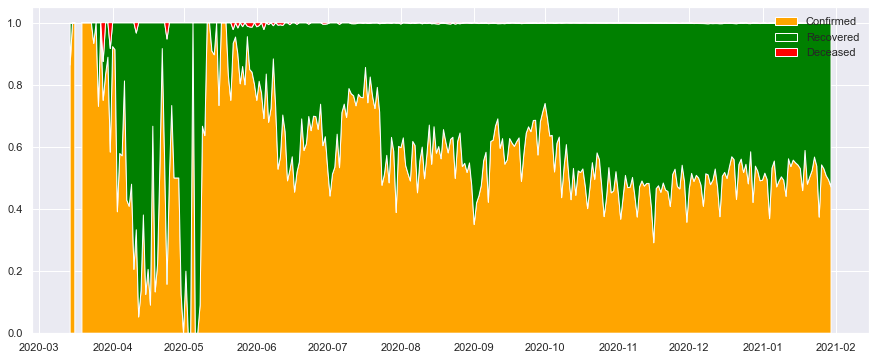

In [42]:
plot_relativestacked_area_by_state('kl')

<ipython-input-41-6f8c87dfd4c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff_[state] = pd.to_numeric(dff_[state])
<ipython-input-41-6f8c87dfd4c6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff_['date'] = pd.to_datetime(dff_['date'])


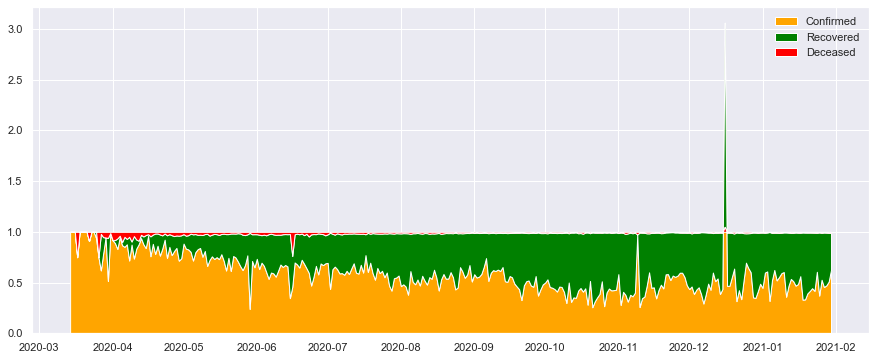

In [43]:
plot_relativestacked_area_by_state('mh')

<ipython-input-41-6f8c87dfd4c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff_[state] = pd.to_numeric(dff_[state])
<ipython-input-41-6f8c87dfd4c6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff_['date'] = pd.to_datetime(dff_['date'])


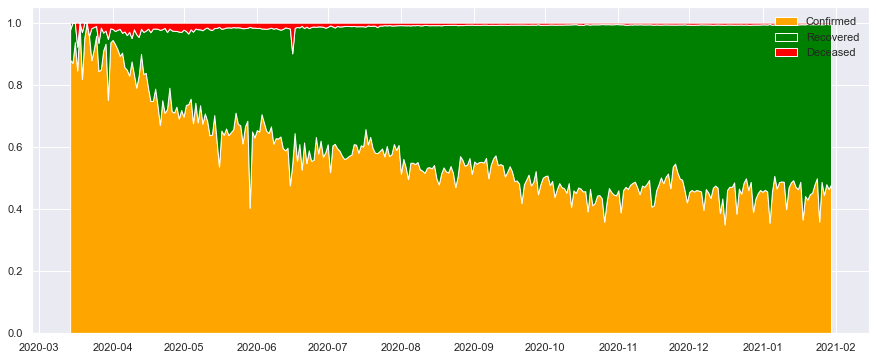

In [44]:
plot_relativestacked_area_by_state('tt')